In [1]:
import urllib.request, urllib.parse,urllib.error
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
df_gps = pd.read_csv('~\Downloads\Data incubator\Int\zip_codes_states.csv', index_col = 0)
df_gps.head()
df_gps.shape

(42741, 5)

In [4]:
df_gps.head()

,latitude,longitude,city,state,county
zip_code,,,,,
501,40.922326,-72.637078,Holtsville,NY,Suffolk
544,40.922326,-72.637078,Holtsville,NY,Suffolk
601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
602,18.393103,-67.180953,Aguada,PR,Aguada
603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [5]:
state_gps = df_gps[df_gps['state']=='CA'].drop_duplicates().dropna()

In [6]:
state_gps.head()

,latitude,longitude,city,state,county
zip_code,,,,,
90001,33.973951,-118.248405,Los Angeles,CA,Los Angeles
90002,33.950514,-118.245855,Los Angeles,CA,Los Angeles
90003,33.949164,-118.273156,Los Angeles,CA,Los Angeles
90004,33.786594,-118.298662,Los Angeles,CA,Los Angeles
90011,33.989264,-118.250056,Los Angeles,CA,Los Angeles


In [7]:
len(state_gps[('county')].unique())

58

In [8]:
ll = state_gps.groupby('county').agg({'latitude': np.max,'longitude': np.max}).sort_values(by='latitude',ascending=False)
ll.head()

,latitude,longitude
county,,
Siskiyou,41.939792,-121.588650
Del Norte,41.925977,-123.810269
Modoc,41.763674,-120.111396
Humboldt,41.304908,-123.557541
Lassen,41.131506,-120.202470


In [9]:
import sys
!{sys.executable} -m pip install gmplot

In [10]:
import gmplot

In [11]:
gmap = gmplot.GoogleMapPlotter(37.428, -122.145, 16)

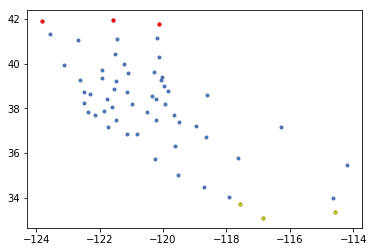

In [461]:
%matplotlib inline
plt.plot(ll[('longitude')],ll[('latitude')],'.')
plt.plot(ll[('longitude')][:3],ll[('latitude')][:3],'r.')
plt.plot(ll[('longitude')][-3:],ll[('latitude')][-3:],'y.')

In [50]:
#%matplotlib inline
#gmap.plot(ll[('longitude')],ll[('latitude')], 'cornflowerblue', edge_width=10)
#gmap.draw("mymap.html")

In [12]:
df_pubsl = pd.read_excel('~\Downloads\Data incubator\Int\pubschls.xlsx', index_col = 0)
df_pubsl.head()
df_pubsl.shape

(17820, 48)

In [13]:
sl = df_pubsl[df_pubsl['StatusType']=='Active'].drop_duplicates()

In [89]:
sl.head()

,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,Zip,...,AdmFName1,AdmLName1,AdmEmail1,AdmFName2,AdmLName2,AdmEmail2,AdmFName3,AdmLName3,AdmEmail3,LastUpDate
CDSCode,,,,,,,,,,,,,,,,,,,,,
1100170000000,691051.0,NaN,Active,Alameda,Alameda County Office of Education,NaN,313 West Winton Avenue,313 West Winton Ave.,Hayward,94544-1136,...,L Karen,Monroe,lkmonroe@acoe.org,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-02
1100170112607,691051.0,10947.0,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,1515 Webster Street,1515 Webster St.,Oakland,94612-3355,...,Eve,Gordon,eve@envisionacademy.org,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-26
1100170123968,691051.0,12844.0,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,2111 International Boulevard,2111 International Blvd.,Oakland,94606-4903,...,Monique,Brinson,moniqueb@communityschoolforcreativeeducation.org,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-16
1100170124172,691051.0,12901.0,Active,Alameda,Alameda County Office of Education,Yu Ming Charter,1086 Alcatraz Avenue,1086 Alcatraz Ave.,Oakland,94608-1265,...,Sue,Park,spark@yumingschool.org,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-10
1100170125567,691051.0,13008.0,Active,Alameda,Alameda County Office of Education,Urban Montessori Charter,5328 Brann Street,5328 Brann St.,Oakland,94619-3312,...,David,Castillo,davidc@urbanmontessori.org,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-09


In [14]:
df_sl = sl.groupby('County')['School'].count()

In [92]:
df_sl.head()

County
Alameda      415
Alpine         3
Amador        16
Butte         97
Calaveras     23
Name: School, dtype: int64

In [17]:
df_gpsl = state_gps.groupby('county').agg({'latitude': np.max,'longitude': np.max})
df_gpsl.head()

,latitude,longitude
county,,
Alameda,37.892675,-121.862128
Alpine,38.771319,-119.832669
Amador,38.556287,-120.352661
Butte,39.995078,-121.220469
Calaveras,38.403007,-120.223837


In [18]:
df_gpsl['count']=df_sl

In [19]:
df_gpsl.head()

,latitude,longitude,count
county,,,
Alameda,37.892675,-121.862128,415
Alpine,38.771319,-119.832669,3
Amador,38.556287,-120.352661,16
Butte,39.995078,-121.220469,97
Calaveras,38.403007,-120.223837,23


In [20]:
cn = df_gpsl.sort_values(by='count',ascending=False)

In [21]:
cn.head()

,latitude,longitude,count
county,,,
Los Angeles,34.014613,-117.917360,2325
San Diego,33.099573,-116.846046,784
Orange,33.741994,-117.564000,629
San Bernardino,35.445323,-114.210609,570
Riverside,33.976814,-114.652517,521


In [22]:
cn.tail()

,latitude,longitude,count
county,,,
Del Norte,41.925977,-123.810269,16
Plumas,40.277282,-120.132207,15
Modoc,41.763674,-120.111396,15
Sierra,39.613937,-120.285676,7
Alpine,38.771319,-119.832669,3


In [118]:
plt.style.use('seaborn-deep')

import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

c = df_gpsl['count']*1.0
type(c)
b=[]
d=[]
for a in c:
    b.append(np.log(a))
    d.append(a**1.01)

df_gpsl.plot.scatter('longitude','latitude',c=df_gpsl['count'], s=d,colormap='viridis')
#plt.plot(ll[('longitude')][:3],ll[('latitude')][:3],'mo')
#plt.plot(ll[('longitude')][-3:],ll[('latitude')][-3:],'co')
plt.plot(cn[('longitude')][0:5],cn[('latitude')][0:5],'w^')
plt.plot(cn[('longitude')][-5:],cn[('latitude')][-5:],'r^')

In [106]:
import urllib.request, urllib.parse,urllib.error
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
cn1 = cn.reset_index()
#for b in cn1['county'][0]:
urlname = cn1['county'][0].lower().replace(' ','-')+'-county' 
print(urlname)
req = Request('https://transparentcalifornia.com/salaries/2016/'+urlname+'/summary/',headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(req).read()
soup = BeautifulSoup(html,'html.parser')
right_table = soup.find('table', class_="table record-detail summary" )
tags = soup('a')

A = []
B = []
C = []

for row in right_table.find_all('tr'):
    cells = row.find_all('td')
    c2 = row.find_all('th')
    A.append((cells[0].find(text=True).strip()))
    B.append(c2[0].find(text=True).strip())
C=[]
for a in A:
    C.append(int(a.replace('$','').replace(',','')))
#C.append(cn1['county'][0])
B[6]='Total county employee comp per resident'
df_county = pd.DataFrame([C],index=[cn1['county'][0]],columns=B)
    
#df_county['county']=cn1['county'][0]
#df_county.set_index(['county'],inplace=True)
df_county

los-angeles-county


,Total population,Total number of county employees,"Total number of full-time,","Median pay for full-time,",Median pay and benefits for,Total county employee compensation,Total county employee comp per resident,"Median earnings for full-time,"
Los Angeles,10057155,107563,92564,72959,100622,11185543613,1112,40469


In [107]:
 df_county_1=df_county.T
for b in cn1['county'][1:]:
    #if (b=='Placer'):
         #b='Placerville'
    if (b=='San Francisco'):
        urlname = b.lower().replace(' ','-')
    else:
        urlname = b.lower().replace(' ','-')+'-county' 
    #print(urlname)
    if (urlname=='calaveras-county'):
        req = Request('https://transparentcalifornia.com/salaries/2013/'+urlname+'/summary/',headers={'User-Agent': 'Mozilla/5.0'})
    else:
        req = Request('https://transparentcalifornia.com/salaries/2016/'+urlname+'/summary/',headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    soup = BeautifulSoup(html,'html.parser')
    right_table = soup.find('table', class_="table record-detail summary" )
    tags = soup('a')

    A = []
    B = []
    C = []

    for row in right_table.find_all('tr'):
        cells = row.find_all('td')
        c2 = row.find_all('th')
        A.append((cells[0].find(text=True).strip()))
        B.append(c2[0].find(text=True).strip())
    C=[]
    for a in A:
          C.append(int(a.replace('$','').replace(',','')))
    #print(C)
    df_county_1[b] = C
df_county = df_county_1.T
df_county

,Total population,Total number of county employees,"Total number of full-time,","Median pay for full-time,",Median pay and benefits for,Total county employee compensation,Total county employee comp per resident,"Median earnings for full-time,"
Los Angeles,10057155,107563,92564,72959,100622,11185543613,1112,40469
San Diego,3253356,20785,15143,64133,93735,1696552249,521,47467
Orange,3132211,19080,16603,68979,102286,1997869226,637,50685
San Bernardino,2106754,22735,14506,55442,79456,1661409918,788,38281
Riverside,2323892,24975,18435,65900,78030,1823415254,784,40306
Santa Clara,1885056,20377,13652,93330,131195,2338042125,1240,75244
Alameda,1605217,10335,7397,80825,118920,1120268628,697,60334
Sacramento,1479300,13273,10069,77862,104038,1262673747,853,42147
Fresno,963160,7970,5811,52750,84119,608634147,631,35041
Contra Costa,1107925,12037,8580,68769,102708,1131292131,1021,62405


In [30]:
df_county.shape

(58, 8)

In [108]:
df_county = df_county.join(cn)

In [109]:
df_county.head()

,Total population,Total number of county employees,"Total number of full-time,","Median pay for full-time,",Median pay and benefits for,Total county employee compensation,Total county employee comp per resident,"Median earnings for full-time,",latitude,longitude,count
Los Angeles,10057155,107563,92564,72959,100622,11185543613,1112,40469,34.014613,-117.917360,2325
San Diego,3253356,20785,15143,64133,93735,1696552249,521,47467,33.099573,-116.846046,784
Orange,3132211,19080,16603,68979,102286,1997869226,637,50685,33.741994,-117.564000,629
San Bernardino,2106754,22735,14506,55442,79456,1661409918,788,38281,35.445323,-114.210609,570
Riverside,2323892,24975,18435,65900,78030,1823415254,784,40306,33.976814,-114.652517,521


In [130]:
df_county.tail()

,Total population,Total number of county employees,"Total number of full-time,","Median pay for full-time,",Median pay and benefits for,Total county employee compensation,Total county employee comp per resident,"Median earnings for full-time,",latitude,longitude,count
Del Norte,27628,523,368,44376,63706,28383503,1027,29878,41.925977,-123.810269,16
Plumas,18754,633,254,49035,69198,26619483,1419,48431,40.277282,-120.132207,15
Modoc,9033,312,157,45946,65803,12743476,1410,28542,41.763674,-120.111396,15
Sierra,2931,153,93,56613,70399,7880468,2688,32026,39.613937,-120.285676,7
Alpine,1184,130,66,58707,75357,6794478,5738,53750,38.771319,-119.832669,3


In [129]:
df_county.sort_values(by='Median pay and benefits for',ascending=False).head()

,Total population,Total number of county employees,"Total number of full-time,","Median pay for full-time,",Median pay and benefits for,Total county employee compensation,Total county employee comp per resident,"Median earnings for full-time,",latitude,longitude,count
Santa Clara,1885056,20377,13652,93330,131195,2338042125,1240,75244,37.456807,-121.493849,431
San Mateo,754748,7567,5527,84899,123043,805973201,1067,63958,37.689182,-122.138765,191
Marin,259358,3178,1781,89117,121804,275878131,1063,83058,38.246928,-122.484360,82
Alameda,1605217,10335,7397,80825,118920,1120268628,697,60334,37.892675,-121.862128,415
San Francisco,850282,40970,32385,89559,118801,4284701637,5039,76374,37.819763,-122.368433,134


In [131]:
df_county.sort_values(by='Median pay and benefits for',ascending=False).tail()

,Total population,Total number of county employees,"Total number of full-time,","Median pay for full-time,",Median pay and benefits for,Total county employee compensation,Total county employee comp per resident,"Median earnings for full-time,",latitude,longitude,count
Butte,223877,3269,1974,50456,65424,162461728,725,38578,39.995078,-121.220469,97
Imperial,178807,2215,1612,49488,65209,134336801,751,33515,33.369594,-114.561905,75
Del Norte,27628,523,368,44376,63706,28383503,1027,29878,41.925977,-123.810269,16
Tulare,455769,4799,3590,51605,62835,283707323,622,31918,36.734051,-118.656086,204
Lassen,31945,548,301,47856,61753,25391109,794,40073,41.131506,-120.202470,26


In [110]:
df_county.describe()

,Total population,Total number of county employees,"Total number of full-time,","Median pay for full-time,",Median pay and benefits for,Total county employee compensation,Total county employee comp per resident,"Median earnings for full-time,",latitude,longitude,count
count,5.800000e+01,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000
mean,6.664580e+05,7187.655172,5335.862069,62704.913793,88253.810345,6.605829e+08,1159.362069,43257.879310,38.103157,-120.325238,182.931034
std,1.459534e+06,15501.666661,13058.342097,12720.377909,18171.008518,1.597811e+09,899.055385,11690.368759,2.169549,2.103106,333.377130
min,1.184000e+03,130.000000,66.000000,44376.000000,61753.000000,6.794478e+06,521.000000,28542.000000,33.099573,-123.810269,3.000000
25%,4.732625e+04,680.250000,396.250000,52699.750000,72430.500000,3.796879e+07,747.250000,35043.250000,37.171350,-121.714471,29.250000
50%,1.811140e+05,2194.500000,1416.500000,59987.500000,87399.000000,1.557222e+08,959.500000,40209.500000,38.324967,-120.431036,82.500000
75%,6.687852e+05,7480.000000,4557.000000,71181.750000,102165.000000,5.875915e+08,1144.000000,47373.000000,39.389356,-119.630194,195.500000
max,1.005716e+07,107563.000000,92564.000000,93330.000000,131195.000000,1.118554e+10,5738.000000,83058.000000,41.939792,-114.210609,2325.000000


In [111]:
c_2_k = ['Total population',
         'Median pay and benefits for',
         'Total county employee compensation',
         'Total county employee comp per resident',
         'Median earnings for full-time,',
         'count']
df_t = df_county[c_2_k]

In [112]:
plt.style.use('seaborn-deep')
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

<IPython.core.display.Javascript object>


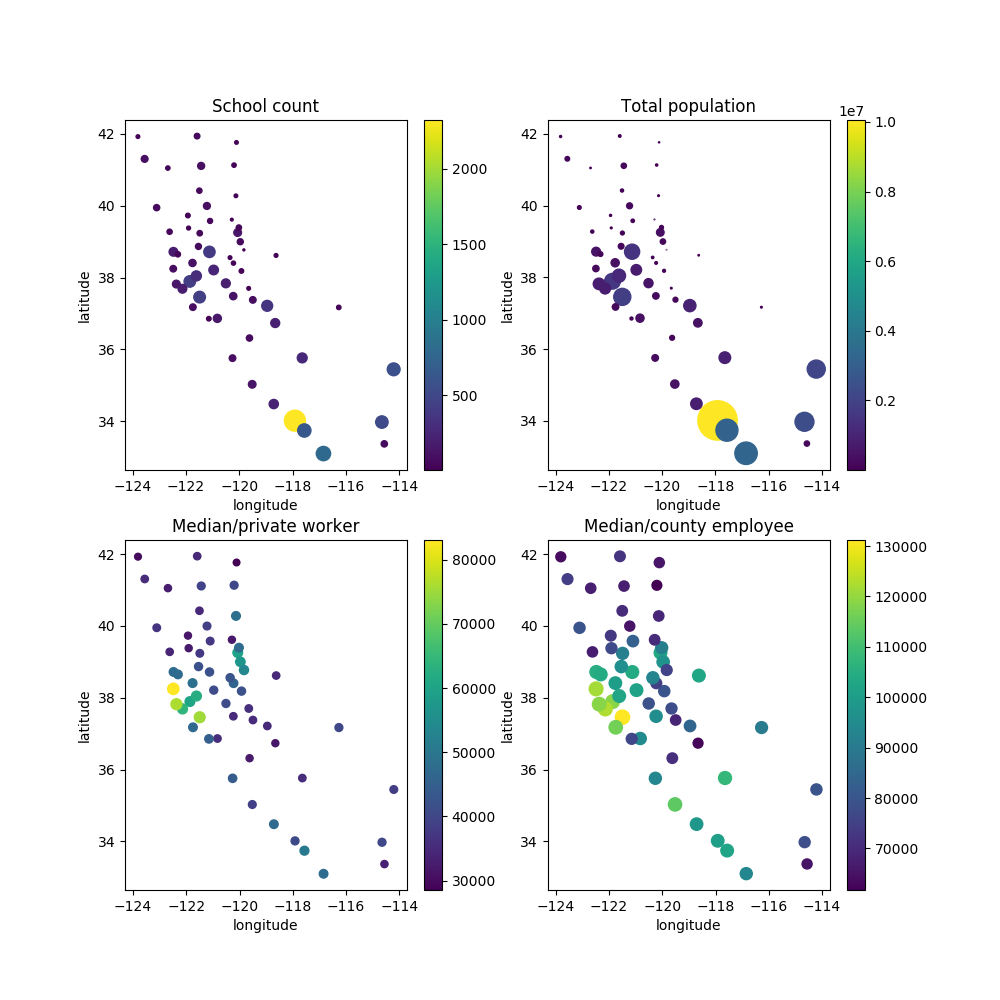

In [352]:
c = df_county['count']*1.0
type(c)
b=[]
d=[]
for a in c:
    b.append(np.log(a))
    d.append(a**0.7)
fig,axes = plt.subplots(nrows=2,ncols=2,figsize = (10,10))
df_county.plot.scatter('longitude','latitude',c=df_county['count'], s=d,colormap='viridis',ax = axes[0,0]);axes[0,0].set_title('School count')
df_county.plot.scatter('longitude','latitude',c=df_county['Median pay and benefits for'], s=df_county['Median pay and benefits for']*0.0008,colormap='viridis',ax = axes[1,1]);axes[1,1].set_title('Median/county employee')
df_county.plot.scatter('longitude','latitude',c=df_county['Median earnings for full-time,'], s=df_county['Median earnings for full-time,']*0.0008,colormap='viridis',ax = axes[1,0]);axes[1,0].set_title('Median/private worker')
df_county.plot.scatter('longitude','latitude',c=df_county['Total population'], s=df_county['Total population']*0.00008,colormap='viridis',ax = axes[0,1]);axes[0,1].set_title('Total population')
#plt.plot(ll[('longitude')][:3],ll[('latitude')][:3],'mo')
#plt.plot(ll[('longitude')][-3:],ll[('latitude')][-3:],'co')
#plt.plot(df_county[('longitude')][0:5],df_county[('latitude')][0:5],'w^')
#plt.plot(df_county[('longitude')][-5:],df_county[('latitude')][-5:],'r^')
plt.savefig('test.png')

In [114]:
from pandas.plotting import scatter_matrix

In [115]:
df_t.head()

,Total population,Median pay and benefits for,Total county employee compensation,Total county employee comp per resident,"Median earnings for full-time,",count
Los Angeles,10057155,100622,11185543613,1112,40469,2325
San Diego,3253356,93735,1696552249,521,47467,784
Orange,3132211,102286,1997869226,637,50685,629
San Bernardino,2106754,79456,1661409918,788,38281,570
Riverside,2323892,78030,1823415254,784,40306,521


KeyError: 2325

<IPython.core.display.Javascript object>


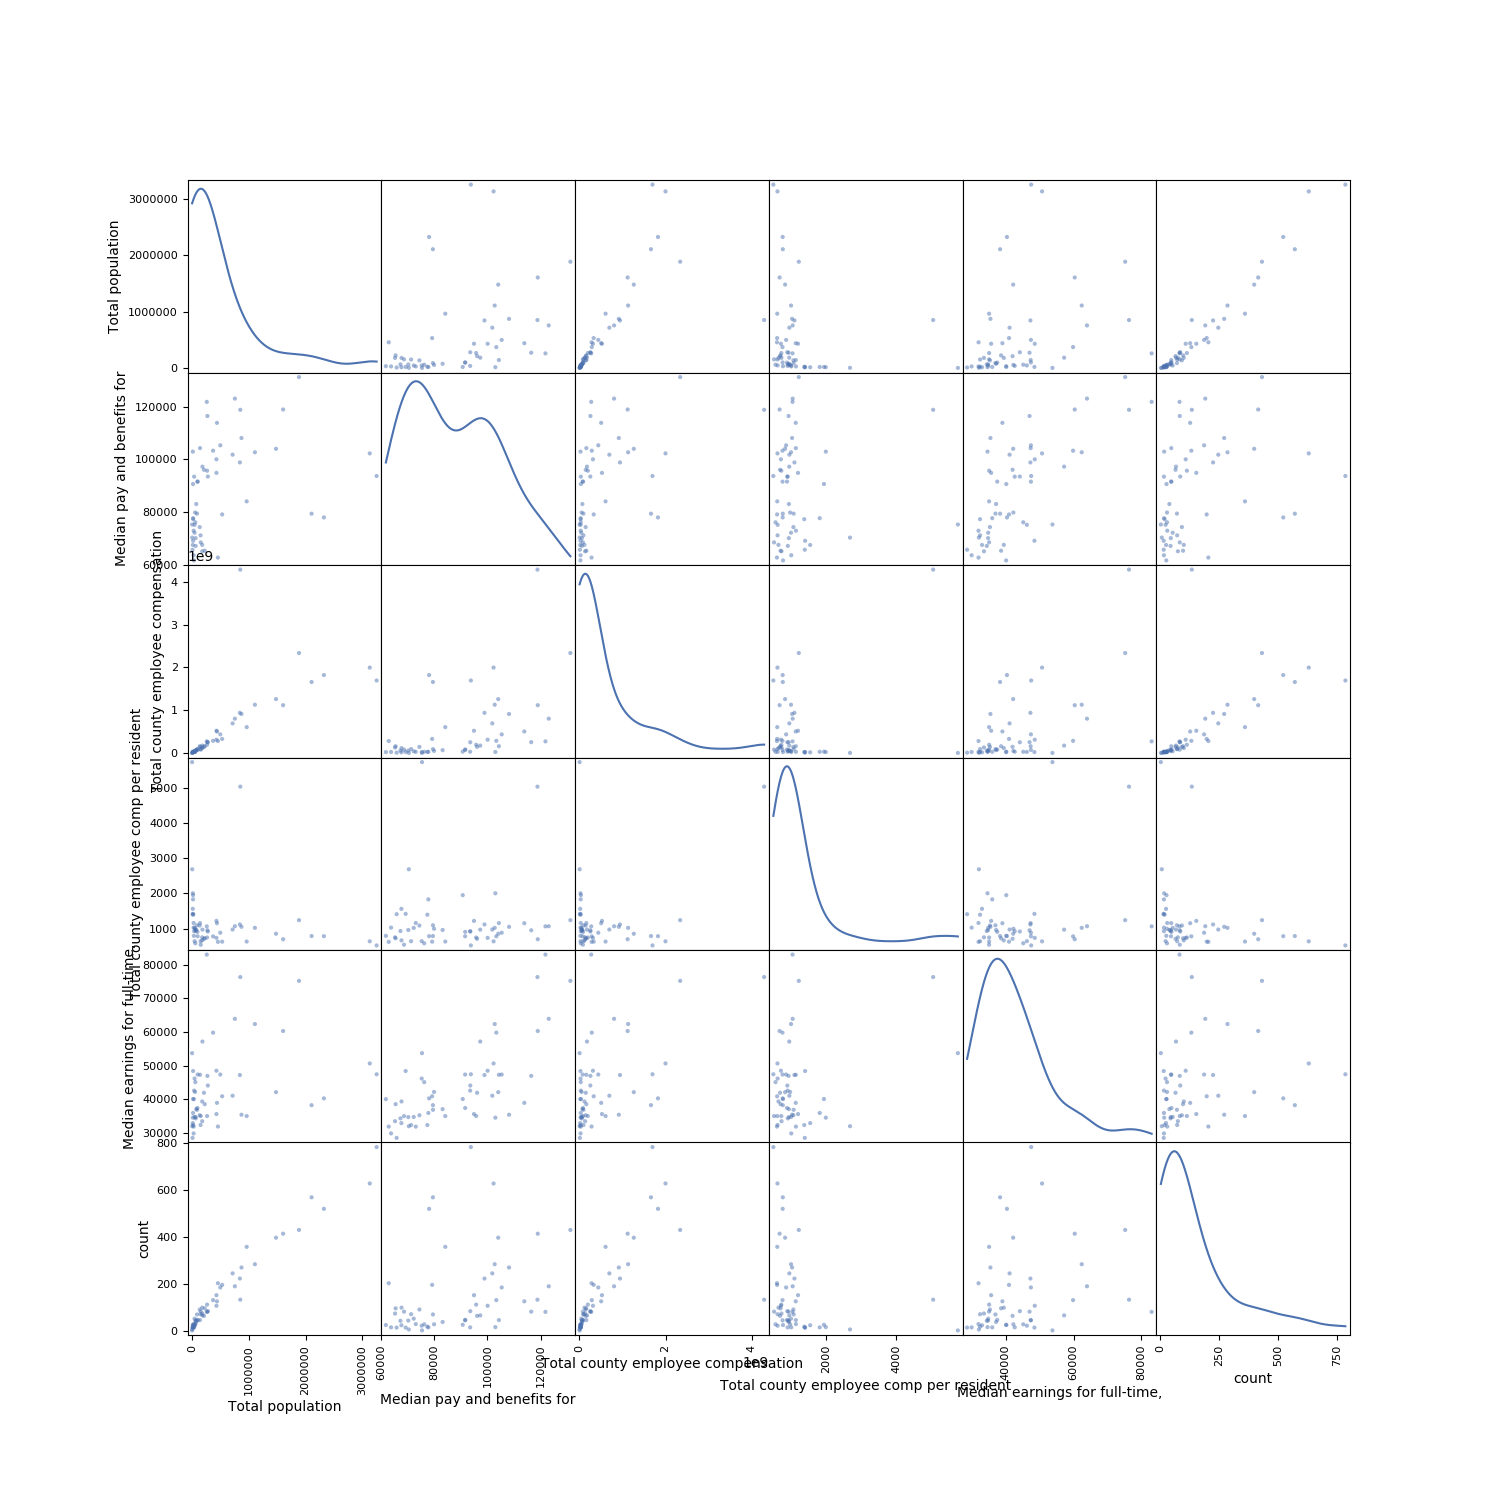

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D81C822E80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000D81F650F98>]], dtype=object)

In [123]:
scatter_matrix(df_t_1,figsize = (15,15),diagonal = 'kde')

In [139]:
import urllib.request, urllib.parse,urllib.error
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
req = Request('http://gis.oshpd.ca.gov/atlas/places/list-of-hospitals',headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(req).read()
soup = BeautifulSoup(html,'html.parser')
tags = soup('a')

In [207]:
import json
import re

In [302]:
data = soup.find_all("script")[3].text
t = data.split('=')[1]
t_1 = t.split(';')[0]
t_2 = t_1[3:].split('"GeoName":')
t_3 = pd.Series()
for a in t_2[1:]:
    n = a.split(',"FacilitiesWithin"')
    m = n[1].split(',"Name":')
    hos = [];
    coun = []
    for b in m[1:]:
        m_1 = b.split(',"City":')
        hos.append(m_1[0].replace('"',''))
        coun.append(n[0].replace('"',''))
    s = pd.Series(hos,index = coun)
    t_3 = t_3.append(s)
#print(t_3)
#t_3.shape
#t_3.head()
df_hospital = pd.DataFrame(t_3,columns = ['hospital'])
df_hospital['county'] = df_hospital.index
#df_hospital.rename(columns = {'index':'county','0':'hosptial count'})
df_hospital = df_hospital[df_hospital['hospital']!='None']
#print(df_hospital)

In [321]:
#df_hospital=df_hospital.reset_index()
#type(df_hospital)
#df_hospital.head()

In [327]:
df_hos_1 = pd.DataFrame(df_hospital.groupby('county').count()['hospital'])
#df_hospital.rename(columns = {'index':'county'})
df_hos_1.head()
df_hos_1.loc['Los Angeles']

hospital    119
Name: Los Angeles, dtype: int64

In [333]:
df_county = pd.merge(df_county,df_hos_1,how='left',left_index = True,right_index=True)
df_county.head()

,Total population,Total number of county employees,"Total number of full-time,","Median pay for full-time,",Median pay and benefits for,Total county employee compensation,Total county employee comp per resident,"Median earnings for full-time,",latitude,longitude,count,hospital
Los Angeles,10057155,107563,92564,72959,100622,11185543613,1112,40469,34.014613,-117.917360,2325,119.0
San Diego,3253356,20785,15143,64133,93735,1696552249,521,47467,33.099573,-116.846046,784,35.0
Orange,3132211,19080,16603,68979,102286,1997869226,637,50685,33.741994,-117.564000,629,38.0
San Bernardino,2106754,22735,14506,55442,79456,1661409918,788,38281,35.445323,-114.210609,570,26.0
Riverside,2323892,24975,18435,65900,78030,1823415254,784,40306,33.976814,-114.652517,521,24.0


<IPython.core.display.Javascript object>


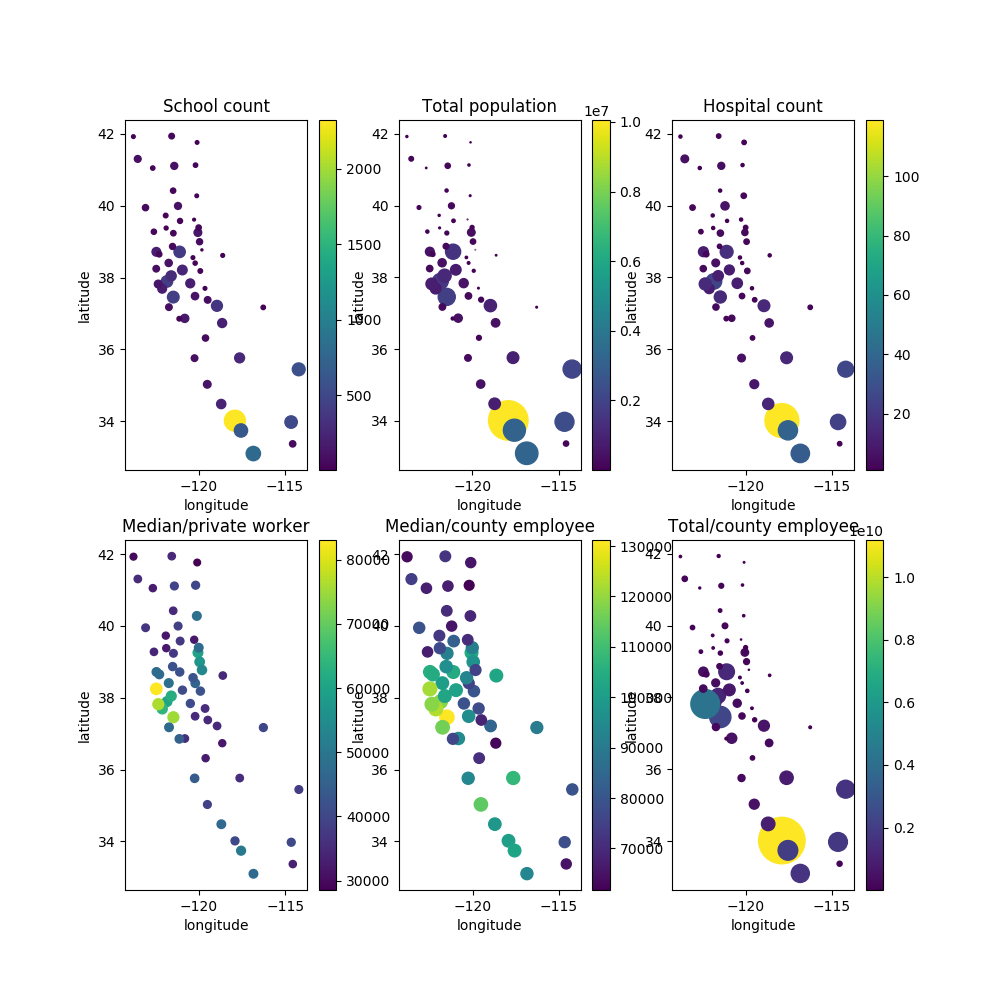

In [353]:
c = df_county['count']*1.0
type(c)
b=[]
d=[]
for a in c:
    b.append(np.log(a))
    d.append(a**0.7)
fig,axes = plt.subplots(nrows=2,ncols=3,figsize = (10,10))
df_county.plot.scatter('longitude','latitude',c=df_county['count'], s=d,colormap='viridis',ax = axes[0,0]);axes[0,0].set_title('School count')
df_county.plot.scatter('longitude','latitude',c=df_county['Median pay and benefits for'], s=df_county['Median pay and benefits for']*0.0008,colormap='viridis',ax = axes[1,1]);axes[1,1].set_title('Median/county employee')
df_county.plot.scatter('longitude','latitude',c=df_county['Median earnings for full-time,'], s=df_county['Median earnings for full-time,']*0.0008,colormap='viridis',ax = axes[1,0]);axes[1,0].set_title('Median/private worker')
df_county.plot.scatter('longitude','latitude',c=df_county['Total population'], s=df_county['Total population']*0.00008,colormap='viridis',ax = axes[0,1]);axes[0,1].set_title('Total population')
df_county.plot.scatter('longitude','latitude',c=df_county['hospital'], s=df_county['hospital']*5,colormap='viridis',ax = axes[0,2]);axes[0,2].set_title('Hospital count')
df_county.plot.scatter('longitude','latitude',c=df_county['Total county employee compensation'], s=df_county['Total county employee compensation']*0.0000001,colormap='viridis',ax = axes[1,2]);axes[1,2].set_title('Total/county employee')
plt.savefig('test.png')

In [350]:
df_county.sort_values(by='Median pay and benefits for',ascending=False).head()

,Total population,Total number of county employees,"Total number of full-time,","Median pay for full-time,",Median pay and benefits for,Total county employee compensation,Total county employee comp per resident,"Median earnings for full-time,",latitude,longitude,count,hospital
Santa Clara,1885056,20377,13652,93330,131195,2338042125,1240,75244,37.456807,-121.493849,431,15.0
San Mateo,754748,7567,5527,84899,123043,805973201,1067,63958,37.689182,-122.138765,191,10.0
Marin,259358,3178,1781,89117,121804,275878131,1063,83058,38.246928,-122.484360,82,4.0
Alameda,1605217,10335,7397,80825,118920,1120268628,697,60334,37.892675,-121.862128,415,25.0
San Francisco,850282,40970,32385,89559,118801,4284701637,5039,76374,37.819763,-122.368433,134,15.0


In [351]:
df_county.sort_values(by='Median pay and benefits for',ascending=False).tail()

,Total population,Total number of county employees,"Total number of full-time,","Median pay for full-time,",Median pay and benefits for,Total county employee compensation,Total county employee comp per resident,"Median earnings for full-time,",latitude,longitude,count,hospital
Butte,223877,3269,1974,50456,65424,162461728,725,38578,39.995078,-121.220469,97,7.0
Imperial,178807,2215,1612,49488,65209,134336801,751,33515,33.369594,-114.561905,75,2.0
Del Norte,27628,523,368,44376,63706,28383503,1027,29878,41.925977,-123.810269,16,1.0
Tulare,455769,4799,3590,51605,62835,283707323,622,31918,36.734051,-118.656086,204,7.0
Lassen,31945,548,301,47856,61753,25391109,794,40073,41.131506,-120.202470,26,1.0


<IPython.core.display.Javascript object>


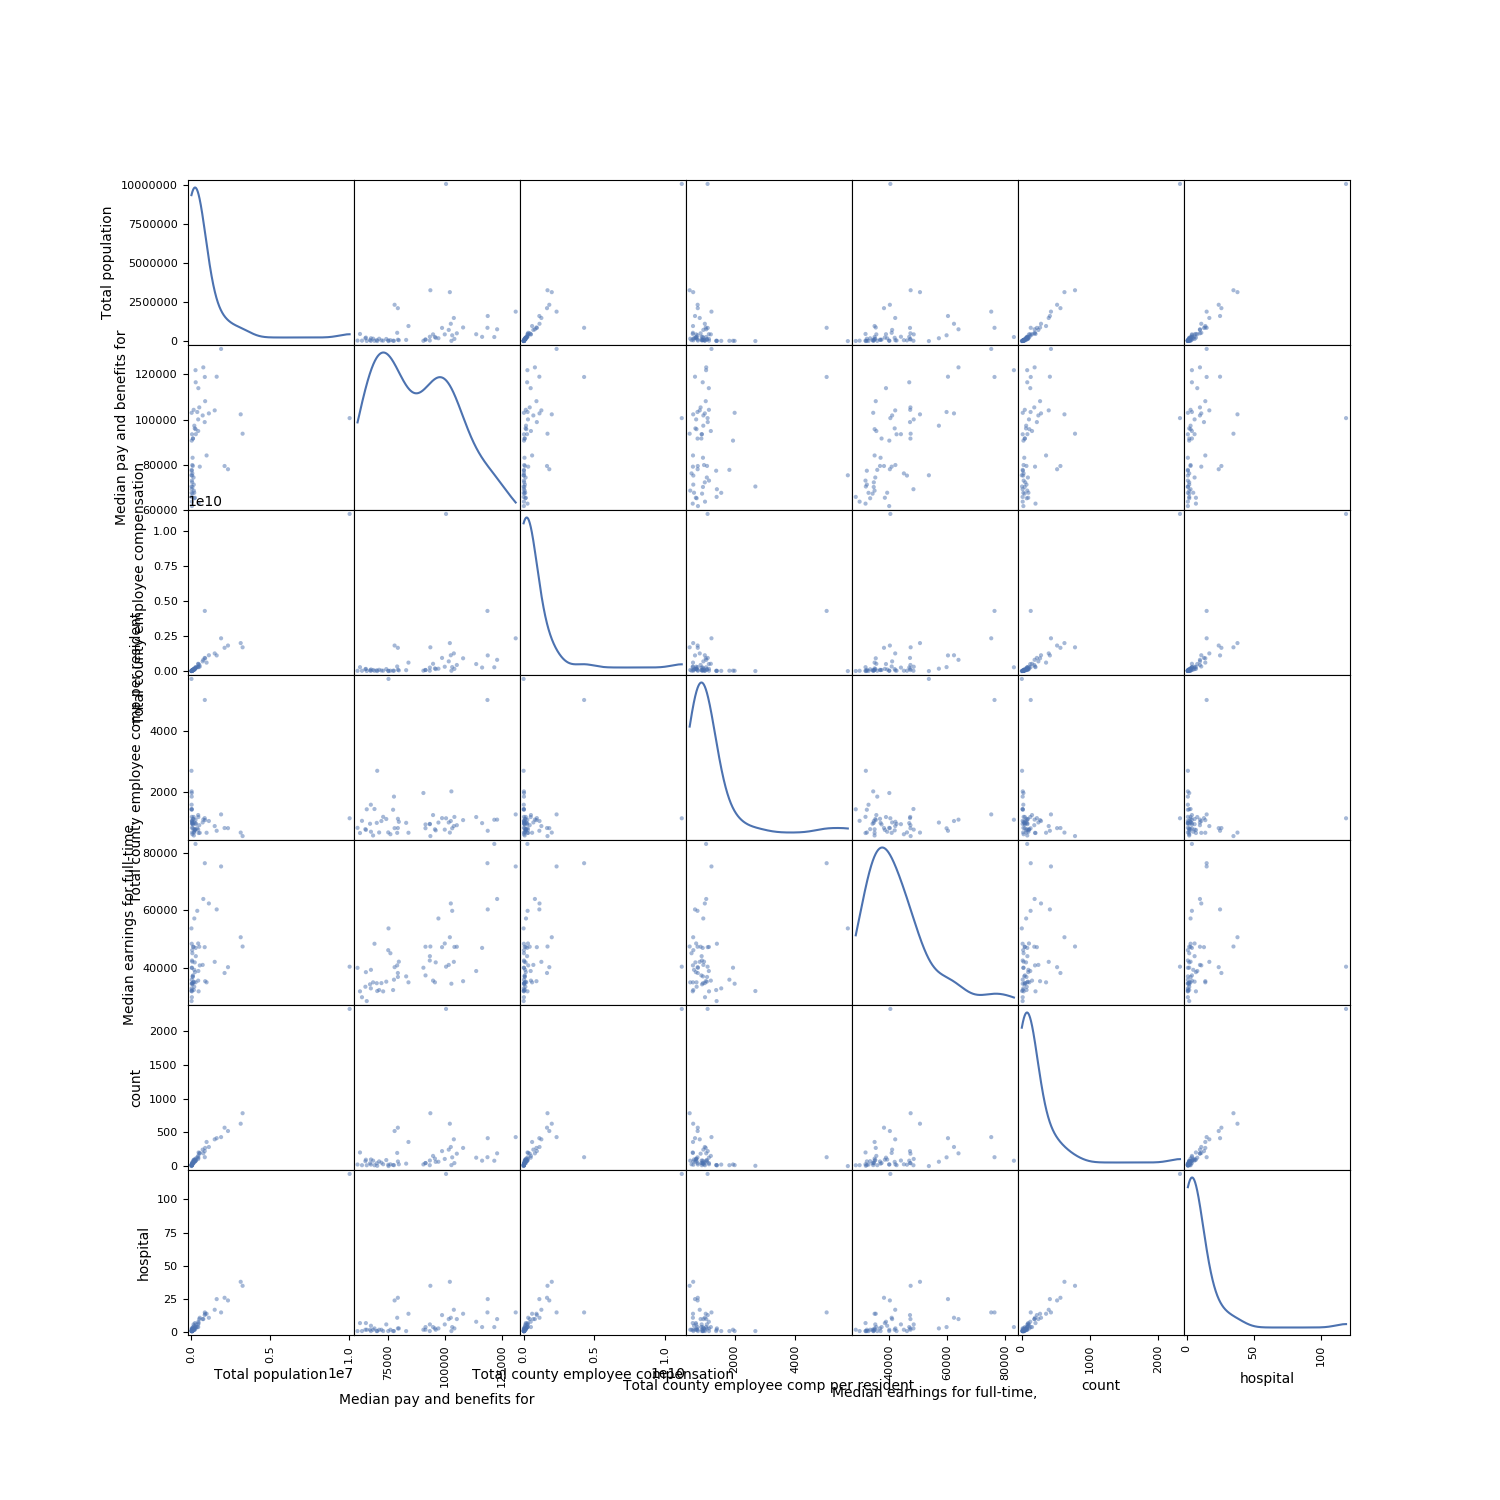

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D83558ABA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000D837214438>]], dtype=object)

In [345]:
c_2_k = ['Total population',
         'Median pay and benefits for',
         'Total county employee compensation',
         'Total county employee comp per resident',
         'Median earnings for full-time,',
         'count',
         'hospital']
df_t = df_county[c_2_k]
scatter_matrix(df_t,figsize = (15,15),diagonal = 'kde')

In [387]:
df_losangeles = pd.read_csv('~\Downloads\Data incubator\Int\los-angeles-county-2016.csv', index_col = 0)
#df_losangeles.shape
df_los = df_losangeles.describe()
print(df_los.loc['50%'])
#df_his_los = pd.Series(df_los,columns = [str(2016)])


df_his_los = pd.DataFrame(pd.Series(df_los.loc['50%']))
df_his_los.rename(columns = {'50%':'2016'})
#pd.Series(df_los.loc['50%'])

Base Pay                56925.0
Overtime Pay              170.0
Benefits                27467.0
Total Pay               63960.0
Total Pay & Benefits    89729.0
Year                     2016.0
Notes                       NaN
Status                      NaN
Name: 50%, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,2016
Base Pay,56925.0
Overtime Pay,170.0
Benefits,27467.0
Total Pay,63960.0
Total Pay & Benefits,89729.0
Year,2016.0
Notes,NaN
Status,NaN


In [391]:
for a in range(2011,2012):
    df_losangeles = pd.read_csv('~\Downloads\Data incubator\Int\los-angeles-county-'+str(a)+'.csv', index_col = 0)
    df_los = df_losangeles.describe().loc['50%']
    print(df_his_los)
    df_his_los[str(a)]=(df_los)
    print(type(df_los))
    print(df_los)
    print(df_his_los)
df_his_los

                          50%  2011
Base Pay              56925.0   NaN
Overtime Pay            170.0   NaN
Benefits              27467.0   NaN
Total Pay             63960.0   NaN
Total Pay & Benefits  89729.0   NaN
Year                   2016.0   NaN
Notes                     NaN   NaN
Status                    NaN   NaN
<class 'pandas.core.series.Series'>
base_pay              53100.63
overtime_pay              0.00
other_pay              2283.84
total_benefits        19822.13
total_pay             57315.23
total_pay_benefits    75519.92
year                   2011.00
notes                      NaN
Name: 50%, dtype: float64
                          50%  2011
Base Pay              56925.0   NaN
Overtime Pay            170.0   NaN
Benefits              27467.0   NaN
Total Pay             63960.0   NaN
Total Pay & Benefits  89729.0   NaN
Year                   2016.0   NaN
Notes                     NaN   NaN
Status                    NaN   NaN


,50%,2011
Base Pay,56925.0,NaN
Overtime Pay,170.0,NaN
Benefits,27467.0,NaN
Total Pay,63960.0,NaN
Total Pay & Benefits,89729.0,NaN
Year,2016.0,NaN
Notes,NaN,NaN
Status,NaN,NaN


In [357]:
df_losangeles.head()

,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
Employee Name,,,,,,,,,,,
John Gruen,CHIEF PHYSICIAN III SURGERY-NEUROLOGICAL,534498.0,0.0,98262,103397.0,632760.0,736157.0,2016,NaN,Los Angeles County,NaN
Arun Amar,SENIOR PHYSICIAN SURGERY-NEUROLOGICAL,502133.0,51303.0,70463,58313.0,623899.0,682212.0,2016,NaN,Los Angeles County,NaN
Rima Matevosian,CHIEF PHYSICIAN II ANESTHESIOLOGY,449888.0,0.0,63208,157434.0,513096.0,670530.0,2016,NaN,Los Angeles County,NaN
Bassam Omari,PHYS SPEC SURGERY-CARDIO THORACIC MEGAFLEX,391648.0,36676.0,83200,154300.0,511524.0,665824.0,2016,NaN,Los Angeles County,NaN
Daniel Zinar,PHYS SPEC SURGERY-ORTHOPEDICS MEGAFLEX,429578.0,37020.0,35125,137766.0,501723.0,639489.0,2016,NaN,Los Angeles County,NaN


In [360]:
df_los = df_losangeles.describe()
df_los

,Base Pay,Overtime Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Status
count,107563.000000,107563.000000,107563.000000,107563.000000,107563.000000,107563.0,0.0,0.0
mean,65049.693212,6041.958880,27635.222400,76355.402750,103990.625150,2016.0,NaN,NaN
std,41569.878724,16268.579481,16677.608048,52298.999954,66950.991746,0.0,NaN,NaN
min,-9632.000000,-10542.000000,-1292.000000,-8323.000000,-8323.000000,2016.0,NaN,NaN
25%,39687.500000,0.000000,17132.000000,43711.000000,64093.500000,2016.0,NaN,NaN
50%,56925.000000,170.000000,27467.000000,63960.000000,89729.000000,2016.0,NaN,NaN
75%,88882.500000,3262.000000,36091.500000,101949.500000,137208.000000,2016.0,NaN,NaN
max,534498.000000,283887.000000,157434.000000,632760.000000,736157.000000,2016.0,NaN,NaN


In [ ]:
A = []
B = []
C = []

for row in right_table.find_all('tr'):
    cells = row.find_all('td')
    c2 = row.find_all('th')
    A.append((cells[0].find(text=True).strip()))
    B.append(c2[0].find(text=True).strip())
C=[]
for a in A:
    C.append(int(a.replace('$','').replace(',','')))
#C.append(cn1['county'][0])
B[6]='Total county employee comp per resident'
df_county = pd.DataFrame([C],index=[cn1['county'][0]],columns=B)
    
#df_county['county']=cn1['county'][0]
#df_county.set_index(['county'],inplace=True)
df_county

In [ ]:
 if len(cells)==8:
        tem = cells[0]('a')
        N.append(tem[0].find(text=True).strip())
        tem1 = cells[1]('a')
        J.append(tem1[0].find(text=True).strip())
        F.append(cells[2].find(text=True))
        A.append(cells[3].find(text=True))
        B.append(cells[4].find(text=True))
        C.append(cells[5].find(text=True))
        D.append(cells[6].find(text=True))
        E.append(cells[7].find(text=True))  

In [211]:
ur_m = []
for tag in tags:
    #print(tag.get('href',None))
    ur = tag.get('href',None)
    #print(ur.find('.csv'))
    if (ur.find('.csv')>0):
       print(ur)
       ur_m.append(tag.get('href',None))
#type(ur)
#ur_m

In [ ]:
df_state=pd.DataFrame()
for row in ur_m:
    df = pd.read_csv(row, index_col = 0)
    #df_state.head()
    #df_state.shape
    

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
df_state.head()

,job_title,base_pay,overtime_pay,other_pay,total_benefits,total_pay,total_pay_benefits,year,notes,jurisdiction_name
employee_name,,,,,,,,,,
MOHAMMAD SAFI,"SENIOR PSYCHIATRIST (SUPERVISOR), CORRECTIONAL...",272277.95,0.0,530993.05,NaN,803271.00,803271.00,2011,NaN,State of California
GERTRUDIS C AGCAOILI,STAFF PSYCHIATRIST (SAFETY) ...,157135.28,0.0,614556.55,NaN,771691.83,771691.83,2011,NaN,State of California
JOSEPH A DEAR,"CHIEF INVESTMENT OFFICER, PUBLIC EMPLOYEES' RE...",438165.30,0.0,84429.00,NaN,522594.30,522594.30,2011,NaN,State of California
THOMAS E ROWE,"PRESIDENT AND CEO, STATE COMPENSATION INSURANC...",457605.00,0.0,56274.00,NaN,513879.00,513879.00,2011,NaN,State of California
CURTIS D ISHII,"SENIOR INVESTMENT OFFICER, PUBLIC EMPLOYEES' R...",353017.70,0.0,147112.00,NaN,500129.70,500129.70,2011,NaN,State of California


In [50]:
type(df_state)

pandas.core.frame.DataFrame